## Character level language model which considers multiple previous characters using Multilayer Neural Nets

In [1]:
#points from research paper
#it is word level language model
#predicts probability of next word based on previous three words
#every input word embedded into some 30 0r 60  dimensional feature vector
#which means there are 17000 words in 30 or 60 dimensional feature space
#words with similar meaning or context are close to each other ,Generality
#three layers
#1.input layer takes index of words and check lookup table for embedding
#2hidden layer with tanh activation function
#3.softmax layer with 170000 classes fully connected to hidden layer(more computation here)

In [3]:
import torch
import matplotlib.pyplot as plt
import torch.nn.functional as F


In [4]:
words=open("names.txt","r").read().splitlines()
len(words)

32033

In [5]:
chars=sorted(list(set(''.join(words))))
stoi={ch:i for i,ch in enumerate(['.']+chars)}

itos={i:ch for ch,i in stoi.items()}
itos

{0: '.',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z'}

In [9]:
X=[]
Y=[]
block_size=3

for word in words[:5]:
    context=[0]*block_size
    for ch in word+'.':
        X.append(context)
     
        ix=stoi[ch]
        Y.append(ix)
        print(''.join([itos[i] for i in context]),"--->",ch)
        context=context[1:]+[ix]
        
X=torch.tensor(X)
Y=torch.tensor(Y)

... ---> e
..e ---> m
.em ---> m
emm ---> a
mma ---> .
... ---> o
..o ---> l
.ol ---> i
oli ---> v
liv ---> i
ivi ---> a
via ---> .
... ---> a
..a ---> v
.av ---> a
ava ---> .
... ---> i
..i ---> s
.is ---> a
isa ---> b
sab ---> e
abe ---> l
bel ---> l
ell ---> a
lla ---> .
... ---> s
..s ---> o
.so ---> p
sop ---> h
oph ---> i
phi ---> a
hia ---> .


In [11]:
X.shape,X.dtype,Y.shape,Y.dtype


(torch.Size([32, 3]), torch.int64, torch.Size([32]), torch.int64)

In [13]:
C=torch.randn((27,2))

In [15]:
emb=C[X]
emb.shape

torch.Size([32, 3, 2])

In [17]:
W1=torch.randn((6,100))
b1=torch.randn(100)

In [19]:
torch.cat([emb[:,0,:],emb[:,1,:],emb[:,2,:]],dim=1)

tensor([[-0.3592, -0.1278, -0.3592, -0.1278, -0.3592, -0.1278],
        [-0.3592, -0.1278, -0.3592, -0.1278,  0.7674, -0.1748],
        [-0.3592, -0.1278,  0.7674, -0.1748, -0.2847, -0.6537],
        [ 0.7674, -0.1748, -0.2847, -0.6537, -0.2847, -0.6537],
        [-0.2847, -0.6537, -0.2847, -0.6537,  0.5622,  1.2240],
        [-0.3592, -0.1278, -0.3592, -0.1278, -0.3592, -0.1278],
        [-0.3592, -0.1278, -0.3592, -0.1278, -1.2007, -1.9440],
        [-0.3592, -0.1278, -1.2007, -1.9440, -0.1781, -0.2513],
        [-1.2007, -1.9440, -0.1781, -0.2513,  0.0310,  0.2792],
        [-0.1781, -0.2513,  0.0310,  0.2792, -0.1412, -0.5684],
        [ 0.0310,  0.2792, -0.1412, -0.5684,  0.0310,  0.2792],
        [-0.1412, -0.5684,  0.0310,  0.2792,  0.5622,  1.2240],
        [-0.3592, -0.1278, -0.3592, -0.1278, -0.3592, -0.1278],
        [-0.3592, -0.1278, -0.3592, -0.1278,  0.5622,  1.2240],
        [-0.3592, -0.1278,  0.5622,  1.2240, -0.1412, -0.5684],
        [ 0.5622,  1.2240, -0.1412, -0.5

In [21]:
torch.cat(torch.unbind(emb,1),dim=1)

tensor([[-0.3592, -0.1278, -0.3592, -0.1278, -0.3592, -0.1278],
        [-0.3592, -0.1278, -0.3592, -0.1278,  0.7674, -0.1748],
        [-0.3592, -0.1278,  0.7674, -0.1748, -0.2847, -0.6537],
        [ 0.7674, -0.1748, -0.2847, -0.6537, -0.2847, -0.6537],
        [-0.2847, -0.6537, -0.2847, -0.6537,  0.5622,  1.2240],
        [-0.3592, -0.1278, -0.3592, -0.1278, -0.3592, -0.1278],
        [-0.3592, -0.1278, -0.3592, -0.1278, -1.2007, -1.9440],
        [-0.3592, -0.1278, -1.2007, -1.9440, -0.1781, -0.2513],
        [-1.2007, -1.9440, -0.1781, -0.2513,  0.0310,  0.2792],
        [-0.1781, -0.2513,  0.0310,  0.2792, -0.1412, -0.5684],
        [ 0.0310,  0.2792, -0.1412, -0.5684,  0.0310,  0.2792],
        [-0.1412, -0.5684,  0.0310,  0.2792,  0.5622,  1.2240],
        [-0.3592, -0.1278, -0.3592, -0.1278, -0.3592, -0.1278],
        [-0.3592, -0.1278, -0.3592, -0.1278,  0.5622,  1.2240],
        [-0.3592, -0.1278,  0.5622,  1.2240, -0.1412, -0.5684],
        [ 0.5622,  1.2240, -0.1412, -0.5

In [23]:
a=torch.arange(18)

In [25]:
a.view(9,2) # extreamly efffient than previous because it doesnt involves storage manupulation

tensor([[ 0,  1],
        [ 2,  3],
        [ 4,  5],
        [ 6,  7],
        [ 8,  9],
        [10, 11],
        [12, 13],
        [14, 15],
        [16, 17]])

In [27]:
a.storage()

C:\Users\Srikanth\AppData\Local\Temp\ipykernel_19968\214256462.py:1: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This should only matter to you if you are using storages directly.  To access UntypedStorage directly, use tensor.untyped_storage() instead of tensor.storage()
  a.storage()


 0
 1
 2
 3
 4
 5
 6
 7
 8
 9
 10
 11
 12
 13
 14
 15
 16
 17
[torch.storage.TypedStorage(dtype=torch.int64, device=cpu) of size 18]

In [29]:
emb.view(32,6)

tensor([[-0.3592, -0.1278, -0.3592, -0.1278, -0.3592, -0.1278],
        [-0.3592, -0.1278, -0.3592, -0.1278,  0.7674, -0.1748],
        [-0.3592, -0.1278,  0.7674, -0.1748, -0.2847, -0.6537],
        [ 0.7674, -0.1748, -0.2847, -0.6537, -0.2847, -0.6537],
        [-0.2847, -0.6537, -0.2847, -0.6537,  0.5622,  1.2240],
        [-0.3592, -0.1278, -0.3592, -0.1278, -0.3592, -0.1278],
        [-0.3592, -0.1278, -0.3592, -0.1278, -1.2007, -1.9440],
        [-0.3592, -0.1278, -1.2007, -1.9440, -0.1781, -0.2513],
        [-1.2007, -1.9440, -0.1781, -0.2513,  0.0310,  0.2792],
        [-0.1781, -0.2513,  0.0310,  0.2792, -0.1412, -0.5684],
        [ 0.0310,  0.2792, -0.1412, -0.5684,  0.0310,  0.2792],
        [-0.1412, -0.5684,  0.0310,  0.2792,  0.5622,  1.2240],
        [-0.3592, -0.1278, -0.3592, -0.1278, -0.3592, -0.1278],
        [-0.3592, -0.1278, -0.3592, -0.1278,  0.5622,  1.2240],
        [-0.3592, -0.1278,  0.5622,  1.2240, -0.1412, -0.5684],
        [ 0.5622,  1.2240, -0.1412, -0.5

In [31]:
h=torch.tanh(emb.view(-1,6)@W1+b1)

In [33]:
h.shape

torch.Size([32, 100])

In [35]:
#nxt layer
W2=torch.randn((100,27))
b2=torch.randn(27)
logits=h@W2+b2
# print(logits.shape)
counts=logits.exp()
probs=counts/counts.sum(1,keepdim=True)
# probs[0].sum()

In [37]:

loss=-probs[torch.arange(32),Y].log().mean()
loss

tensor(15.8096)

## Now made respectable

In [155]:
#build dataset
def build_dataset(words):
        X=[]
        Y=[]
        block_size=4
        
        for word in words:
            context=[0]*block_size
            for ch in word+'.':
                X.append(context)
             
                ix=stoi[ch]
                Y.append(ix)
                
                context=context[1:]+[ix]
                
        X=torch.tensor(X)
        Y=torch.tensor(Y)
        print(X.shape,Y.shape)
        return X,Y
import random
random.seed(42)
random.shuffle(words)
n1=int(0.8*len(words))
n2=int(0.9*len(words))
Xtre,Ytre=build_dataset(words[:n1])
Xval,Yval=build_dataset(words[n1:n2])
Xte,Yte=build_dataset(words[n2:])

torch.Size([182437, 4]) torch.Size([182437])
torch.Size([22781, 4]) torch.Size([22781])
torch.Size([22928, 4]) torch.Size([22928])


In [157]:
g=torch.Generator().manual_seed(2147483647) #reproducability
C=torch.randn((27,10),generator=g)
W1=torch.randn((40,200),generator=g)
b1=torch.randn(200,generator=g)
W2=torch.randn((200,27),generator=g)
b2=torch.randn(27,generator=g)
parameters=[C,W1,b1,W2,b2]


In [159]:
sum(p.nelement() for p in parameters)

13897

In [161]:
for p in parameters:
    p.requires_grad=True

### finding best learnig rate

In [164]:

#experiment with to find upper bound and lower bound a,these bound can be idnetified by seeing unstable loss

lre=torch.linspace(-3,0,1000)
lrs=10**lre

In [125]:
lri=[]
lossi=[]
stepi=[]

In [ ]:

for i in range(10000):
    #minibatch construct since ntire dataset takes lot of computation
    ix=torch.randint(0,Xtre.shape[0],(32,))
    #forward pass
    emb=C[Xtre[ix]] #(32,3,2)
    h=torch.tanh(emb.view(-1,40)@W1+b1) #32,100
    logits=h@W2+b2 #32,27
    # counts=logits.exp()
    # probs=counts/counts.sum(1,keepdim=True)
    # loss=-probs[torch.arange(32),Y].log().mean()
    loss=F.cross_entropy(logits,Ytre[ix]) #forwardpass and backwardpass are efficient
    # print(loss.item())

    #backward
    for p in parameters:
        p.grad=None

    loss.backward()

    #update
    # lr=lrs[i]
    lr=0.01
    # if i<5000:
    #     lr=0.1
    # else:
    #     lr=0.01
    for p in parameters:
        p.data+=-lr*p.grad
    # lri.append(lr)
    stepi.append(i)
    lossi.append(loss)
    
print(loss)
#loss not zero ... --> all alphabets

In [ ]:
# plt.plot(torch.tensor(lri),torch.tensor(lossi)) #for determining learning rate

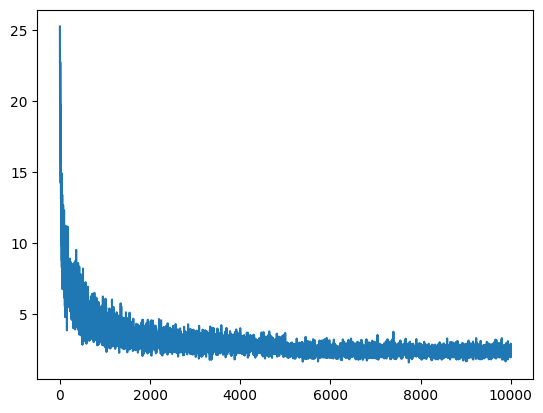

In [129]:
plt.plot(torch.tensor(stepi),torch.tensor(lossi)) #to determine the hyperparameter tuning"

In [170]:
emb=C[Xtre] #(32,3,2)
h=torch.tanh(emb.view(-1,40)@W1+b1) #32,100
logits=h@W2+b2 #32,27
loss=F.cross_entropy(logits,Ytre)
print(loss.item())

2.3164477348327637


In [172]:
emb=C[Xval] #(32,3,2)
h=torch.tanh(emb.view(-1,40)@W1+b1) #32,100
logits=h@W2+b2 #32,27
loss=F.cross_entropy(logits,Yval)
print(loss.item())

2.3398563861846924


In [137]:
#embedding plot for two dimensional embeddings
plt.figure(figsize=(8,8))

plt.scatter(C[:,0].data,C[:,1].data,s=200)
for i in  range(C.shape[0]):
    plt.text(C[i,0].item(),C[i,1].item(),itos[i],ha="center",va="center",color="white")
plt.grid()

In [103]:
#note :
#in this by using batches we find approx grad rather than exact grad,it suitable in  practice
#as the size of the network increases it may lead s to overfitting loss~0
#training split,dev/val split ,test split
# If the validation accuracy is much lower than the training accuracy, the model might be overfitting (memorizing instead of generalizing).
#80%,10%,10%
#we can increase performace we can increase network size or increase dimentions of embeddings

#### justification for cross entropy

In [106]:

logits=torch.tensor([-5,-3,0,100])
counts=logits.exp()
p=counts/counts.sum()
p

tensor([0., 0., 0., nan])

In [108]:
#for more positive value logits.exp become inf
#for more negative values logits.exp become small

In [110]:
#cross entropy
logits=logits-logits.max()
counts=logits.exp()
p=counts/counts.sum()
p

tensor([0.0000e+00, 1.4013e-45, 3.7835e-44, 1.0000e+00])

In [174]:
#sampling from model
for i in range(5):
    out=[]
    
    context=[0]*4
    while True:
        emb=C[torch.tensor(context)] #(1,blocksize,d)
        h=emb.view(1,-1)@W1+b1
        logits=h@W2+b2
        probs=F.softmax(logits,dim=1)
       
        ix=torch.multinomial(probs,num_samples=1,generator=g).item()
        context=context[1:]+[ix]
        out.append(ix)
        if ix==0:
            break
    print(''.join(itos[i] for i in out))
        
        


        

csqfenininininianii.
csqfentinanii.
csadii.
csqfentininininianii.
csqfeninianii.
